# Quick Start - CCDS Template

This notebook runs the complete flow of a typical Data Science project following the CCDS format.

## 1. Setup

In [1]:
import os
import sys
import pandas as pd
import numpy as np
from pathlib import Path

In [2]:
from pathlib import Path
import sys
import os

# Pega o caminho do diretório atual onde o notebook está rodando
notebook_dir = Path(os.getcwd())

# Ajuste a quantidade de níveis para chegar na raiz do projeto
project_dir = notebook_dir.parents[0]  # Ajuste conforme sua estrutura

src_dir = project_dir / "src"
sys.path.append(str(src_dir))

## 2. Load Raw Data

In [6]:
from src.dataset import main as load_dataset

In [7]:
load_dataset(50)

2025-08-24 13:56:57.648 | INFO     | src.dataset:main:21 - Starting dataset processing with max_drawings=50...
loading coffee cup drawings
load complete
Number of drawings uploaded: 50


Saving drawings: 50it [00:00, 208.12it/s]

2025-08-24 13:56:57.898 | SUCCESS  | src.dataset:main:40 - Processing dataset complete. Elapsed time: 0.25 seconds


## 2. Features

In [8]:
from src.features import main as process_dataset
from src.plots import main as generate_plots

In [9]:
process_dataset()

2025-08-24 13:57:00.258 | INFO     | src.features:main:22 - Generating features from dataset...
2025-08-24 13:57:00.261 | INFO     | src.features:main:33 - Dataset loaded with 50 images and 1 classes.


Saving tensors by class: 100%|██████████| 1/1 [00:00<00:00,  4.19it/s]

Processed 50 images for class 'coffee_cup'
2025-08-24 13:57:00.505 | SUCCESS  | src.features:main:47 - Features generation complete. Elapsed time: 0.25 seconds


2025-08-24 13:57:00.516 | INFO     | src.plots:main:22 - Generating plot from data...


Plotting classes:   0%|          | 0/2 [00:00<?, ?it/s]

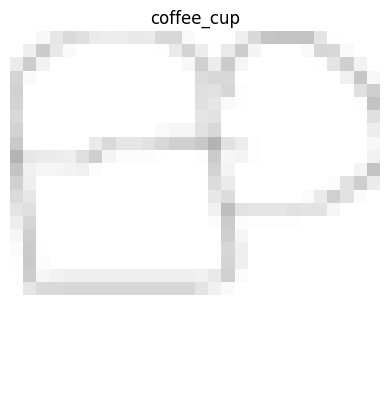

Plotting classes: 100%|██████████| 2/2 [00:00<00:00, 17.02it/s]

2025-08-24 13:57:00.638 | SUCCESS  | src.plots:main:49 - Plot generation complete. Elapsed time: 0.12 seconds


In [10]:
generate_plots()

## 3. Model Training

In [11]:
raise Exception("Stop here for editing")

Exception: Stop here for editing

In [ ]:
print("Training model...")
model = train_model(X, y)

## 6. Prediction & Evaluation

In [ ]:
print("Generating predictions...")
y_pred = predict(model, X)

In [ ]:
print("Evaluating model...")
metrics = evaluate_model(y, y_pred)
print(metrics)

## 7. Visualization

In [ ]:
print("Visualizing results...")
plot_results(y, y_pred)